In [ ]:
# !pip install llama-index sentence-transformers

In [ ]:
import csv
import pandas as pd

In [ ]:
kb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fine_tuning_embedding_model/NHSRC_KB - English.csv")

In [ ]:
kb.head()

,Name of document,Page no.,Text
0,Induction Training Module for ASHA English,1,Induction Training Module\nfor ASHAs\n(A conso...
1,Induction Training Module for ASHA English,2,Design and layout:\nNew Concept Information Sy...
2,Induction Training Module for ASHA English,3,Contents\nSection 1\nBeing an ASHA 7\nSection ...
3,Induction Training Module for ASHA English,4,Acknowledgements\nThe Induction Training Modul...
4,Induction Training Module for ASHA English,5,What is this Book about?\nYou have chosen to b...


In [ ]:
kb.tail()

,Name of document,Page no.,Text
1077,Menstrual Hygiene Reading Material For ASHA,9,9 Menstrual Hygiene: Reading Material for ASHA...
1078,Menstrual Hygiene Reading Material For ASHA,10,10 Menstrual Hygiene: Reading Material for ASH...
1079,Menstrual Hygiene Reading Material For ASHA,11,11 Menstrual Hygiene: Reading Material for ASH...
1080,Menstrual Hygiene Reading Material For ASHA,12,12 Menstrual Hygiene: Reading Material for ASH...
1081,Menstrual Hygiene Reading Material For ASHA,13,ii Menstrual Hygiene: Reading Material for ASHA\n


In [ ]:
kb['Page no.'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158])

In [ ]:
print(len(kb['Name of document'].unique()))
documents_in_kb = kb['Name of document'].unique()
documents_in_kb

21


array(['Induction Training Module for ASHA English',
       'Elderly Care Training Manual for ASHA',
       'Menstrual Hygiene Planner', 'ASHA NCD Module-English',
       'Eye Care Training Manual for ASHA',
       'Emergency Care Training Manual for ASHA at AB-HWC',
       'Post Partum Care Home Visits For Normal Babies English',
       'ENT Care Training Manual for ASHA', 'An ASHAs Activities English',
       'PLA Module for ASHA_English',
       'MNS care Training manual for ASHA at HWC (english)',
       'ASHA Handbook - Mobilizing for Action on Violence against Women English',
       'Oral Care Training Manual for ASHA',
       'Home Visits For High Risk Babies English',
       'Skills That Save Lives ASHA Module-7 English',
       'Palliative Care Training Manual for ASHA at AB-HWC',
       'Training Manual on SCD for MPW & ASHA',
       'Complications During Post Partum Period English',
       'Handbook For ASHA On Home Based Care For Young Child-English',
       'Induction Trai

In [ ]:
faqs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fine_tuning_embedding_model/All_FAQS_with_MetaData - v1.csv")

In [ ]:
faqs.head()

,question,answer,theme,keywords,Name of Document,Page no.
0,What is the purpose of this book?,The purpose of this book is to provide ASHA wo...,purpose,['book'],Induction Training Module for ASHA English,[5]
1,Why do ASHA workers need additional knowledge ...,ASHA workers need additional knowledge and ski...,ASHA workers,"['additional knowledge', 'skills', 'effective ...",Induction Training Module for ASHA English,[5]
2,What are some of the things ASHA workers need ...,ASHA workers need to learn about health rights...,ASHA workers,"['health rights', 'entitlements', 'causes', 't...",Induction Training Module for ASHA English,[5]
3,What skills do ASHA workers need to develop?,ASHA workers need to develop the skills to com...,ASHA workers,"['skills', 'communicate health-related informa...",Induction Training Module for ASHA English,[5]
4,What does the ASHA training program consist of?,The ASHA training program consists of multiple...,ASHA training program,"['multiple rounds of training', 'basic knowled...",Induction Training Module for ASHA English,[5]


In [ ]:
faqs.tail()

,question,answer,theme,keywords,Name of Document,Page no.
4185,Who should co-sign the registers and accounts ...,A designated female member of the VHSC (Villag...,registers and accounts of sanitary napkin pack...,"['designated female member', 'VHSC', 'register...",Menstrual Hygiene Reading Material For ASHA,"[11, 12]"
4186,What information should be included in Format ...,"Format A should include the name of the girl, ...",Format A for maintaining records,"['name of the girl', 'APL', 'BPL', 'sanitary n...",Menstrual Hygiene Reading Material For ASHA,"[11, 12]"
4187,What information should be included in Format ...,Format B should include the name of the ASHA w...,Format B for the monthly report,"['ASHA worker', 'village', 'stock of sanitary ...",Menstrual Hygiene Reading Material For ASHA,"[11, 12]"
4188,What contact should ASHA workers have with ado...,ASHA workers should have contact with adolesce...,ASHA workers and adolescent girls,"['ASHA workers', 'adolescent girls', 'contact'...",Menstrual Hygiene Reading Material For ASHA,"[11, 12]"
4189,What is the purpose of the Sunday meetings?,The purpose of the Sunday meetings is to sell ...,Sunday meetings and purpose,"['Sunday meetings', 'purpose', 'sell sanitary ...",Menstrual Hygiene Reading Material For ASHA,"[11, 12]"


In [ ]:
print(len(faqs['Name of Document'].unique()))
documents_in_faqs = faqs['Name of Document'].unique()
documents_in_faqs

18


array(['Induction Training Module for ASHA English',
       'Elderly Care Training Manual for ASHA',
       'Menstrual Hygiene Planner', 'ASHA NCD Module-English',
       'Eye Care Training Manual for ASHA',
       'Emergency Care Training Manual for ASHA at AB-HWC',
       'ENT Care Training Manual for ASHA', 'An ASHAs Activities English',
       'PLA Module for ASHA_English',
       'MNS care Training manual for ASHA at HWC (english)',
       'ASHA Handbook - Mobilizing for Action on Violence against Women English',
       'Oral Care Training Manual for ASHA',
       'Skills That Save Lives ASHA Module-7 English',
       'Palliative Care Training Manual for ASHA at AB-HWC',
       'Training Manual on SCD for MPW & ASHA',
       'Handbook For ASHA On Home Based Care For Young Child-English',
       'Induction Training Module for ASHAs in Urban Areas English',
       'Menstrual Hygiene Reading Material For ASHA'], dtype=object)

Checking whether the faqs docs are all part of kb

In [ ]:
for i in documents_in_faqs:
  # print(i)
  if i not in documents_in_kb:
    print(f"{i} document is not a apart of kb.")

## Generating corpus


In [ ]:
kb.head()

,Name of document,Page no.,Text
0,Induction Training Module for ASHA English,1,Induction Training Module\nfor ASHAs\n(A conso...
1,Induction Training Module for ASHA English,2,Design and layout:\nNew Concept Information Sy...
2,Induction Training Module for ASHA English,3,Contents\nSection 1\nBeing an ASHA 7\nSection ...
3,Induction Training Module for ASHA English,4,Acknowledgements\nThe Induction Training Modul...
4,Induction Training Module for ASHA English,5,What is this Book about?\nYou have chosen to b...


In [ ]:
kb.shape

(1082, 3)

### Splitting the kb csv into train and val data

In [ ]:
# from sklearn.model_selection import train_test_split
# # Set the random seed for reproducibility
# random_seed = 42

# # Specify the percentage of data to be used for validation
# validation_split = 0.2

# # Split the data into training and validation sets
# train_files, val_files = train_test_split(kb, test_size=validation_split, random_state=random_seed)


In [ ]:
# train_files.shape

In [ ]:
# train_files.head()

In [ ]:

# # Optionally, you can reset the indices of the new DataFrames
# train_files = train_files.reset_index(drop=True)
# val_files = val_files.reset_index(drop=True)

In [ ]:
# train_files.head()

In [ ]:
kb.head()

,Name of document,Page no.,Text
0,Induction Training Module for ASHA English,1,Induction Training Module\nfor ASHAs\n(A conso...
1,Induction Training Module for ASHA English,2,Design and layout:\nNew Concept Information Sy...
2,Induction Training Module for ASHA English,3,Contents\nSection 1\nBeing an ASHA 7\nSection ...
3,Induction Training Module for ASHA English,4,Acknowledgements\nThe Induction Training Modul...
4,Induction Training Module for ASHA English,5,What is this Book about?\nYou have chosen to b...


In [ ]:
kb.shape

(1082, 3)

In [ ]:
corpus = {}
for i in range(kb.shape[0]):
  node_id = kb['Name of document'][i] +'_' +  str(kb['Page no.'][i])
  print(node_id)
  corpus[node_id] = kb['Text'][i]
  # print(corpus)
  # break

Induction Training Module for ASHA English_1
Induction Training Module for ASHA English_2
Induction Training Module for ASHA English_3
Induction Training Module for ASHA English_4
Induction Training Module for ASHA English_5
Induction Training Module for ASHA English_6
Induction Training Module for ASHA English_7
Induction Training Module for ASHA English_8
Induction Training Module for ASHA English_9
Induction Training Module for ASHA English_10
Induction Training Module for ASHA English_11
Induction Training Module for ASHA English_12
Induction Training Module for ASHA English_13
Induction Training Module for ASHA English_14
Induction Training Module for ASHA English_15
Induction Training Module for ASHA English_16
Induction Training Module for ASHA English_17
Induction Training Module for ASHA English_18
Induction Training Module for ASHA English_19
Induction Training Module for ASHA English_20
Induction Training Module for ASHA English_21
Induction Training Module for ASHA English_

In [ ]:
len(corpus)

1082

In [ ]:
print(corpus)

{'Induction Training Module for ASHA English_1': 'Induction Training Module\nfor ASHAs\n(A consolidated version of Modules 1 to 5  \nfor newly selected ASHAs) ', 'Induction Training Module for ASHA English_2': 'Design and layout:\nNew Concept Information Systems Pvt. Ltd.', 'Induction Training Module for ASHA English_3': 'Contents\nSection 1\nBeing an ASHA 7\nSection 2\nWhat is a Healthy Community? 19\nSection 3\nUnderstanding Rights and Right to Health 21\nSection 4\nSkills of an ASHA 29\nSection 5\nKnowing About Health, Hygiene and Illness 41\nSection 6\nDealing with Common Health Problems 49\nSection 7\nInfectious Diseases - Tuberculosis,  \nLeprosy and Malaria 59\nSection 8\nMaternal Health 65\nSection 9\nNewborn Care 73\nSection 10\nInfant and Young Child Nutrition 79\nSection 11\nAdolescent Health 97\nSection 12\nReproductive Tract Infections and  Sexually Transmitted Infections 105\nSection 13\nPreventing Unwanted Pregnancies 109\nSection 14\nSafe Abortion 113\nAnnexures 117', '

## Creating queries, relevant docs from faqs csv

In [ ]:
import uuid

In [ ]:
faqs.head()

,question,answer,theme,keywords,Name of Document,Page no.
0,What is the purpose of this book?,The purpose of this book is to provide ASHA wo...,purpose,['book'],Induction Training Module for ASHA English,[5]
1,Why do ASHA workers need additional knowledge ...,ASHA workers need additional knowledge and ski...,ASHA workers,"['additional knowledge', 'skills', 'effective ...",Induction Training Module for ASHA English,[5]
2,What are some of the things ASHA workers need ...,ASHA workers need to learn about health rights...,ASHA workers,"['health rights', 'entitlements', 'causes', 't...",Induction Training Module for ASHA English,[5]
3,What skills do ASHA workers need to develop?,ASHA workers need to develop the skills to com...,ASHA workers,"['skills', 'communicate health-related informa...",Induction Training Module for ASHA English,[5]
4,What does the ASHA training program consist of?,The ASHA training program consists of multiple...,ASHA training program,"['multiple rounds of training', 'basic knowled...",Induction Training Module for ASHA English,[5]


Checking whether the doc_pageno are present in corpus

In [ ]:
len(eval(faqs['Page no.'][25]))

2

In [ ]:
ids_present = 0
for i in range(faqs.shape[0]):
  if len(eval(faqs['Page no.'][i])) == 1:
    dumm = faqs['Name of Document'][i] + '_'+ str(eval(faqs['Page no.'][i])[0])
    # print(dumm)
    if dumm not in corpus.keys():
      print("Not there")
    else:
      ids_present+=1
  else:
    for j in range(len(eval(faqs['Page no.'][i]))):
      dumm = faqs['Name of Document'][i] + '_'+ str(eval(faqs['Page no.'][i])[j])
      # print(dumm)
      if dumm not in corpus.keys():
        print("Not there")
      else:
        ids_present+=1
print(ids_present)

7934


In [ ]:
faqs.shape

(4190, 6)

Splitting the faqs into train and val sets

In [ ]:
from sklearn.model_selection import train_test_split
# Set the random seed for reproducibility
random_seed = 42

# Specify the percentage of data to be used for validation
validation_split = 0.25

# Split the data into training and validation sets
train_corpus, val_corpus = train_test_split(faqs, test_size=validation_split, random_state=random_seed)
train_corpus = train_corpus.reset_index(drop=True)
val_corpus = val_corpus.reset_index(drop=True)

In [ ]:
train_corpus.shape

(3142, 6)

In [ ]:
train_corpus.head()

,question,answer,theme,keywords,Name of Document,Page no.
0,When can activism/protest be useful?,Activism/protest can be useful under the right...,activism/protest,"['useful', 'right circumstances', 'voice', 'ca...",Induction Training Module for ASHA English,"[36, 37]"
1,"Apart from home visits, what other responsibil...","Apart from home visits, the ASHA also has to a...",ASHA responsibilities,"['home visits', 'ASHA', 'Village Health and Nu...",PLA Module for ASHA_English,"[1, 2]"
2,What does PLA stand for?,PLA stands for Participatory Learning and Action.,PLA,"['PLA', 'Participatory Learning and Action']",PLA Module for ASHA_English,"[5, 6]"
3,What should you do if organizing group discuss...,"If organizing group discussions doesn't work, ...",Problem-solving,"['organizing', 'group discussions', 'work', 'i...",Induction Training Module for ASHAs in Urban A...,"[37, 38]"
4,How can it be determined if a child's weight i...,If the point representing the child's weight i...,Child Weight,"['determined', 'child', 'weight', 'normal', 'p...",Induction Training Module for ASHAs in Urban A...,[100]


In [ ]:
val_corpus.shape

(1048, 6)

Creating dictionaries


In [ ]:
def generate_queries(faq_corpus):
  queries = {}
  relevant_docs = {}
  for i in range(faq_corpus.shape[0]):
    question_id = str(uuid.uuid4())
    queries[question_id] = faq_corpus['question'][i]
    # print(faq_corpus['question'][i])
    rel_ids = []
    for j in range(len(eval(faq_corpus['Page no.'][i]))):
      # print(faq_corpus['Name of Document'][i] +'_'+ str(eval(faq_corpus['Page no.'][i])[j]))
      rel_ids.append(faq_corpus['Name of Document'][i] +'_'+ str(eval(faq_corpus['Page no.'][i])[j]))
    # print(rel_ids)
    relevant_docs[question_id] = rel_ids
    # break
  return queries,relevant_docs

Generating the queries and rel_docs for training and val sets

In [ ]:
train_queries, train_relevant_docs = generate_queries(train_corpus)

In [ ]:
val_queries, val_relevant_docs = generate_queries(val_corpus)

Merge Data

In [ ]:
train_dataset = {
    'queries': train_queries,
    'corpus': corpus,
    'relevant_docs': train_relevant_docs,
}

val_dataset = {
    'queries': val_queries,
    'corpus': corpus,
    'relevant_docs': val_relevant_docs,
}

# Finetuning using the LlamaIndex approach

In [ ]:
import json

# Save train_dataset and val_dataset as JSON files
with open("train_dataset.json", "w") as train_file:
    json.dump(train_dataset, train_file)

with open("val_dataset.json", "w") as val_file:
    json.dump(val_dataset, val_file)

In [ ]:
from llama_index.finetuning import EmbeddingQAFinetuneDataset


train_dataset_ll = EmbeddingQAFinetuneDataset.from_json("train_dataset.json")
val_dataset_ll = EmbeddingQAFinetuneDataset.from_json("val_dataset.json")

In [ ]:
print(train_dataset_ll.corpus['Emergency Care Training Manual for ASHA at AB-HWC_16'])
print("17")
print(train_dataset_ll.corpus['Emergency Care Training Manual for ASHA at AB-HWC_17'])

Training Manual on Management of Common Emergencies, Burns and Trauma for ASHA  
at Ayushman Bharat- Health and Wellness Centres16 2. Make sure all areas of the house are well lit.
3. Get eyesight checked regularly, especially for older people in the house.
4. Take proper precautions if any occupational hazards are present at workplace (eg. caution 
while working with heavy machinery, use of safety guards to prevent injury from thresher and cutter while farming, handling of chemicals, live wires etc.)
5. Always stay alert and look in all directions while walking on/crossing roads and streets.
6. Always wear seat belt or helmet when traveling in vehicles.
7. Avoid the use of mobile phones while crossing/walking on the roads, driving or riding. 
8. When driving vehicles, always follow safety and traffic rules.
9. Teach children to be safe while playing outdoors.
3.2. Burns
3.2.1. Recognizing life threatening situation
3.2.2. Management Protocol 
Specific Measures
In cases of burns, use t

In [ ]:
# train_dataset_ll.queries['']

In [ ]:
# train_dataset_ll.relevant_docs['0015e70b-f4e7-42d1-9e4a-c32505bad26b']

In [ ]:
from llama_index.finetuning import SentenceTransformersFinetuneEngine
finetune_engine = SentenceTransformersFinetuneEngine(
    train_dataset_ll,
    model_id="BAAI/bge-small-en",
    model_output_path="test_model",
    val_dataset=val_dataset_ll,
)

In [ ]:
finetune_engine.finetune()

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/315 [00:00<?, ?it/s]

Iteration:   0%|          | 0/315 [00:00<?, ?it/s]

In [ ]:
embed_model = finetune_engine.get_finetuned_model()

In [ ]:
embed_model

HuggingFaceEmbedding(model_name='test_model', embed_batch_size=10, callback_manager=<llama_index.callbacks.base.CallbackManager object at 0x7914612009d0>, tokenizer_name='test_model', max_length=512, pooling=<Pooling.CLS: 'cls'>, normalize=True, query_instruction=None, text_instruction=None, cache_folder=None)

## Evaluate fine-tuned model

In [ ]:
from llama_index import ServiceContext, VectorStoreIndex
from llama_index.schema import TextNode
from tqdm.notebook import tqdm
import pandas as pd

In [ ]:
def evaluate(
    dataset,
    embed_model,
    top_k=5,
    verbose=False,
):
    corpus = dataset.corpus
    queries = dataset.queries
    relevant_docs = dataset.relevant_docs

    service_context = ServiceContext.from_defaults(embed_model=embed_model,llm=None)
    nodes = [TextNode(id_=id_, text=text) for id_, text in corpus.items()]
    index = VectorStoreIndex(nodes, service_context=service_context, show_progress=True)
    retriever = index.as_retriever(similarity_top_k=top_k)

    eval_results = []
    for query_id, query in tqdm(queries.items()):
        retrieved_nodes = retriever.retrieve(query)
        retrieved_ids = [node.node.node_id for node in retrieved_nodes]
        expected_ids = relevant_docs[query_id]
        # print(expected_ids)
        # is_hit = expected_ids in retrieved_ids  # assume 1 relevant doc


        retrieved_set = set(retrieved_ids)
        expected_set = set(expected_ids)
        common_nodes = retrieved_set.intersection(expected_set)
        # print(common_nodes)
        is_hit = len(common_nodes) > 0




        eval_result = {
            "is_hit": is_hit,
            "retrieved": retrieved_ids,
            "expected": expected_ids,
            "query": query_id,
        }
        eval_results.append(eval_result)
        # break
    return eval_results

In [ ]:
from sentence_transformers.evaluation import InformationRetrievalEvaluator
from sentence_transformers import SentenceTransformer


def evaluate_st(
    dataset,
    model_id,
    name,
):
    corpus = dataset.corpus
    queries = dataset.queries
    relevant_docs = dataset.relevant_docs

    evaluator = InformationRetrievalEvaluator(queries, corpus, relevant_docs, name=name)
    model = SentenceTransformer(model_id)
    return evaluator(model, output_path="results/")

Evaluation for bge/small model

Hit rate: simple top-k retrieval for each query/relevant_doc pair. If the results contain the relevant_doc, it’s a “hit.”

InformationRetrievalEvaluator: Suite of metrics for evaluating open source embeddings.

In [ ]:
bge = "local:BAAI/bge-small-en"
bge_val_results = evaluate(val_dataset_ll, bge)

LLM is explicitly disabled. Using MockLLM.


Generating embeddings:   0%|          | 0/1082 [00:00<?, ?it/s]

  0%|          | 0/1048 [00:00<?, ?it/s]

In [ ]:
# bge_val_results

In [ ]:
df_bge = pd.DataFrame(bge_val_results)

In [ ]:
df_bge.head()

,is_hit,retrieved,expected,query
0,False,[Induction Training Module for ASHAs in Urban ...,"[ASHA NCD Module-English_7, ASHA NCD Module-En...",7e078e42-10ec-4cbe-85a7-e1732ccb8541
1,True,"[PLA Module for ASHA_English_18, PLA Module fo...","[PLA Module for ASHA_English_17, PLA Module fo...",3c954f11-140f-46ab-baa2-ab82ed3c0fa7
2,True,[MNS care Training manual for ASHA at HWC (eng...,[MNS care Training manual for ASHA at HWC (eng...,0e5f78b1-96c6-4e85-9992-44ddd440e0d8
3,False,[Induction Training Module for ASHAs in Urban ...,[Induction Training Module for ASHA English_25...,a97610da-45aa-491c-a6e2-63be75bf711d
4,False,[Induction Training Module for ASHA English_25...,[Skills That Save Lives ASHA Module-7 English_84],038791b9-8b59-44ce-bb02-bd3bd61866f9


Hit-rate of original bge model

In [ ]:
hit_rate_bge = df_bge['is_hit'].mean()
hit_rate_bge

0.6927480916030534

Evaluation using InformationRetirevalEvaluator for original bge model

In [ ]:
evaluate_st(val_dataset_ll, "BAAI/bge-small-en", name='bge')

0.3247236281371156

## Fine tuned model

In [ ]:
finetuned = "local:test_model"
val_results_finetuned = evaluate(val_dataset_ll, finetuned)

LLM is explicitly disabled. Using MockLLM.


Generating embeddings:   0%|          | 0/1082 [00:00<?, ?it/s]

  0%|          | 0/1048 [00:00<?, ?it/s]

In [ ]:
df_finetuned = pd.DataFrame(val_results_finetuned)

In [ ]:
df_finetuned.head()

,is_hit,retrieved,expected,query
0,False,"[ASHA NCD Module-English_57, Palliative Care T...","[ASHA NCD Module-English_7, ASHA NCD Module-En...",7e078e42-10ec-4cbe-85a7-e1732ccb8541
1,True,"[PLA Module for ASHA_English_18, ASHA NCD Modu...","[PLA Module for ASHA_English_17, PLA Module fo...",3c954f11-140f-46ab-baa2-ab82ed3c0fa7
2,True,[MNS care Training manual for ASHA at HWC (eng...,[MNS care Training manual for ASHA at HWC (eng...,0e5f78b1-96c6-4e85-9992-44ddd440e0d8
3,True,[Induction Training Module for ASHA English_24...,[Induction Training Module for ASHA English_25...,a97610da-45aa-491c-a6e2-63be75bf711d
4,True,[Skills That Save Lives ASHA Module-7 English_...,[Skills That Save Lives ASHA Module-7 English_84],038791b9-8b59-44ce-bb02-bd3bd61866f9


In [ ]:
hit_rate_finetuned = df_finetuned['is_hit'].mean()
hit_rate_finetuned

0.7366412213740458

In [ ]:
evaluate_st(val_dataset_ll, "test_model", name='finetuned')

0.4102419009805281

SUmmary

In [ ]:
df_bge['model'] = 'bge'
df_finetuned['model'] = 'fine_tuned'

In [ ]:
df_all = pd.concat([df_bge, df_finetuned])
df_all.groupby('model').mean('is_hit')

,is_hit
model,
bge,0.692748
fine_tuned,0.736641


from matplotlib import pyplot as plt
_df_0['is_hit'].plot(kind='hist', bins=20, title='is_hit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['is_hit']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'is_hit'}, axis=1)
              .sort_values('is_hit', ascending=True))
  xs = counted['is_hit']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('is_hit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_hit')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['is_hit'].plot(kind='line', figsize=(8, 4), title='is_hit')
plt.gca().spines[['top', 'right']].set_visible(False)

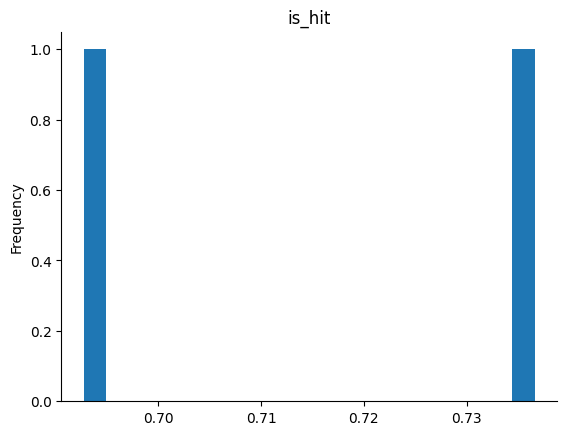

In [ ]:
from matplotlib import pyplot as plt
_df_0['is_hit'].plot(kind='hist', bins=20, title='is_hit')
plt.gca().spines[['top', 'right',]].set_visible(False)

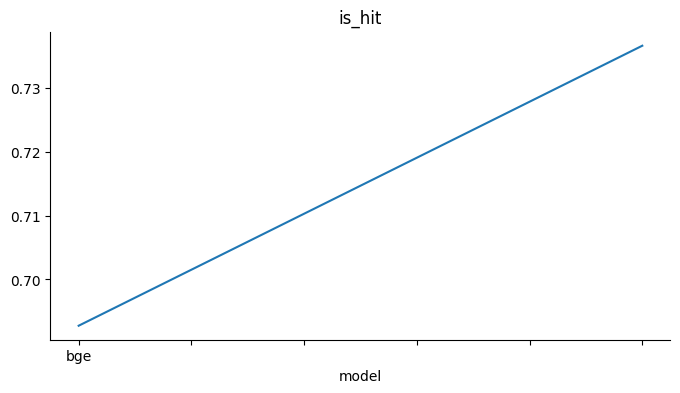

In [ ]:
from matplotlib import pyplot as plt
_df_2['is_hit'].plot(kind='line', figsize=(8, 4), title='is_hit')
plt.gca().spines[['top', 'right']].set_visible(False)

InformationRetrievalEvaluator

In [ ]:
df_st_bge = pd.read_csv('results/Information-Retrieval_evaluation_bge_results.csv')
df_st_finetuned = pd.read_csv('results/Information-Retrieval_evaluation_finetuned_results.csv')

df_st_bge['model'] = 'bge'
df_st_finetuned['model'] = 'fine_tuned'
df_st_all = pd.concat([df_st_bge, df_st_finetuned])
df_st_all = df_st_all.set_index('model')
df_st_all


,epoch,steps,cos_sim-Accuracy@1,cos_sim-Accuracy@3,cos_sim-Accuracy@5,cos_sim-Accuracy@10,cos_sim-Precision@1,cos_sim-Recall@1,cos_sim-Precision@3,cos_sim-Recall@3,...,dot_score-Recall@1,dot_score-Precision@3,dot_score-Recall@3,dot_score-Precision@5,dot_score-Recall@5,dot_score-Precision@10,dot_score-Recall@10,dot_score-MRR@10,dot_score-NDCG@10,dot_score-MAP@100
model,,,,,,,,,,,,,,,,,,,,,
bge,-1,-1,0.361641,0.545802,0.620229,0.700382,0.361641,0.189408,0.210560,0.334924,...,0.189408,0.210560,0.334924,0.150191,0.399809,0.091031,0.486164,0.471094,0.394635,0.324724
bge,-1,-1,0.361641,0.545802,0.620229,0.700382,0.361641,0.189408,0.210560,0.334924,...,0.189408,0.210560,0.334924,0.150191,0.399809,0.091031,0.486164,0.471094,0.394635,0.324724
bge,-1,-1,0.361641,0.545802,0.620229,0.700382,0.361641,0.189408,0.210560,0.334924,...,0.189408,0.210560,0.334924,0.150191,0.399809,0.091031,0.486164,0.471094,0.394635,0.324724
fine_tuned,-1,-1,0.418893,0.666985,0.730916,0.802481,0.418893,0.221851,0.265585,0.425095,...,0.221851,0.265585,0.425095,0.190458,0.508111,0.115172,0.613550,0.553683,0.490607,0.410096
fine_tuned,-1,-1,0.418893,0.666985,0.730916,0.802481,0.418893,0.221851,0.265585,0.425095,...,0.221851,0.265585,0.425095,0.190458,0.508111,0.115172,0.613550,0.553683,0.490607,0.410096
fine_tuned,-1,-1,0.416985,0.661260,0.736641,0.801527,0.416985,0.220897,0.263041,0.420324,...,0.220897,0.263041,0.420324,0.191031,0.509065,0.114981,0.612118,0.552579,0.489772,0.410242


# Finetuning using general Sentence Transformer approach

Loading pretrained model

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model_id = "BAAI/bge-small-en"
model = SentenceTransformer(model_id)

In [ ]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': True}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [ ]:
import json

# Save train_dataset and val_dataset as JSON files
with open("train_dataset.json", "w") as train_file:
    json.dump(train_dataset, train_file)

with open("val_dataset.json", "w") as val_file:
    json.dump(val_dataset, val_file)

In [ ]:
import json

TRAIN_DATASET_FPATH = './train_dataset.json'
VAL_DATASET_FPATH = './val_dataset.json'

In [ ]:
with open(TRAIN_DATASET_FPATH, 'r+') as f:
    train_dataset = json.load(f)

with open(VAL_DATASET_FPATH, 'r+') as f:
    val_dataset = json.load(f)

Define dataloader

In [ ]:
from torch.utils.data import DataLoader
from sentence_transformers import InputExample

In [ ]:
# should be larger
BATCH_SIZE = 10

In [ ]:
dataset = train_dataset

corpus = dataset['corpus']
queries = dataset['queries']
relevant_docs = dataset['relevant_docs']
# for query_id, query in queries.items():
#   for i in range(len(relevant_docs[query_id])):
#     print(relevant_docs[query_id][i])
#   break


examples = []
for query_id, query in queries.items():
  for i in range(len(relevant_docs[query_id])):
    node_id = relevant_docs[query_id][i]
    text = corpus[node_id]
    example = InputExample(texts=(query, text))
    examples.append(example)
print(examples)
print(len(examples))

[<sentence_transformers.readers.InputExample.InputExample object at 0x791474135a50>, <sentence_transformers.readers.InputExample.InputExample object at 0x791474134b20>, <sentence_transformers.readers.InputExample.InputExample object at 0x791474135a20>, <sentence_transformers.readers.InputExample.InputExample object at 0x791474134280>, <sentence_transformers.readers.InputExample.InputExample object at 0x791474134220>, <sentence_transformers.readers.InputExample.InputExample object at 0x791474134b80>, <sentence_transformers.readers.InputExample.InputExample object at 0x7914741351b0>, <sentence_transformers.readers.InputExample.InputExample object at 0x791474134f70>, <sentence_transformers.readers.InputExample.InputExample object at 0x791474134be0>, <sentence_transformers.readers.InputExample.InputExample object at 0x7914741352d0>, <sentence_transformers.readers.InputExample.InputExample object at 0x7914741353c0>, <sentence_transformers.readers.InputExample.InputExample object at 0x791474

In [ ]:
# from sentence_transformers.datasets import SentenceLabelDataset, SentencesDataset


In [ ]:
# train_dataset = SentenceLabelDataset(examples, model=model)

# # Create DataLoader using the created dataset
# loader = DataLoader(
#     SentencesDataset(examples, model=model),
#     batch_size=BATCH_SIZE,
#     shuffle=True,
# )

In [ ]:
loader = DataLoader(
    examples, batch_size=BATCH_SIZE
)

In [ ]:
print(examples[0])
type(examples)

<InputExample> label: 0, texts: When can activism/protest be useful?; Induction Training Module for ASHAs
 36l Do not argue: Negotiating is about arriving at solutions. Arguing is about 
trying to prove the other person wrong. We know that during negotiation 
when each party tries to prove the other one wrong, no progress is made. 
If you disagree with something state your disagreement in a gentle, but assertive, way. Do not demean the other person or get into a power struggle. 
l Consider timing: There are good times to negotiate and bad times. Bad times include those situations where there is a high degree of anger on 
either side, a preoccupation with something else, a high level of stress or 
tiredness on one side or the other. 
Suggestions for effective negotiation 
While negotiating as an ASHA you must be patient. Never try to make the opponent feel low and defeated. Empathise with the other person to 
understand her/his perspective. Be positive and open in your approach. Do not 

list

Define Loss

In [ ]:
from sentence_transformers import losses

In [ ]:
loss = losses.MultipleNegativesRankingLoss(model)

Define evaluator

In [ ]:
from sentence_transformers.evaluation import InformationRetrievalEvaluator

In [ ]:
dataset = val_dataset

corpus = dataset['corpus']
queries = dataset['queries']
relevant_docs = dataset['relevant_docs']

evaluator = InformationRetrievalEvaluator(queries, corpus, relevant_docs)

Run training

In [ ]:
EPOCHS = 2

In [ ]:
warmup_steps = int(len(loader) * EPOCHS * 0.1)

model.fit(
    train_objectives=[(loader, loss)],
    epochs=EPOCHS,
    warmup_steps=warmup_steps,
    output_path='exp_finetune',
    show_progress_bar=True,
    evaluator=evaluator,
    evaluation_steps=50,
)

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/595 [00:00<?, ?it/s]

TypeError: ignored